In [2]:
#get packages
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error as mse, r2_score as rsq

from scipy.optimize import curve_fit
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
#import tensorflow as tf
#import tensorflow.keras as keras

In [5]:
# (A) MOODEL PREDICTING USING CURVE FITTING

N=100
X=np.random.uniform(0.0,10.0,size=N)
W=np.random.normal(size=N)
a=0.75
b=4.5
w=0.07
phi=0.

t = np.arange(-100,101)
nois = np.random.normal(loc=3,scale=2, size=201)
Y= a + b * np.sin(w*t + phi) + 0.3 * nois
    
#compute time series
#t = np.arange(-100,101)
#Y = ts(0.75,4.5,0.07,1.6,t)

#CURVE FITTING TO FUNCTION
def sinfunc(A,B,C,D,t):
    return A + B * np.sin(C*t + D)
(a,b,c,d), pcov = curve_fit(sinfunc, t, Y, p0=(1,5,0.06,2))
pred = sinfunc(a, b, c, d, t)
#get errors
r2 = rsq(Y,pred)

Text(0.5, 1.0, 'non-linear fitting with curve fitting')

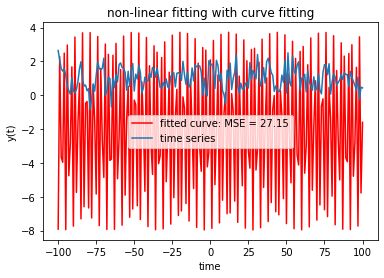

In [6]:
#SHOW THE PLOT
fig = plt.figure()
plt.plot(t, pred,'r-', label = "fitted curve: MSE = %3.2f" %(mse(Y,pred)))
plt.plot(t,Y,label = "time series")
plt.xlabel("time")
plt.ylabel("y(t)")
plt.legend()
plt.title('non-linear fitting with curve fitting')


In [16]:
# (B) MODEL PREDICTING USING SHALLOW LEARNING(RANDOM FOREST)

#SPLIT THE DATA INTO TRAINING AND TESTENIG SETS
from sklearn.model_selection import train_test_split
t_train, t_test, Y_train, Y_test = train_test_split(t,Y,test_size= 0.25)

rf = RandomForestRegressor(n_estimators=20) #rf with 20 tress
rf.fit(t_train[:,np.newaxis],Y_train)
pred = rf.predict(t_train[:,np.newaxis])
pred_final = rf.predict(t_test[:,np.newaxis])

print("RF Training MSE: %3.3f " %(mse(Y_train,pred)))
print("RF Final MSE: %3.3f " %(mse(Y_test,pred_final)))

RF Training MSE: 0.466 
RF Final MSE: 2.955 


Text(0.5, 1.0, 'non-linear fitting with random forest')

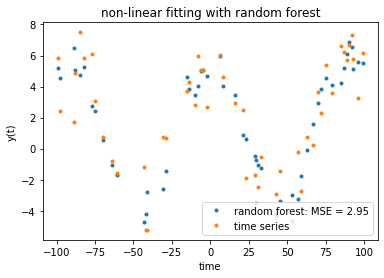

In [17]:
#plot random forest
fig1 = plt.figure()
plt.plot(t_test, pred_final,'.', label = "random forest: MSE = %3.2f" %(mse(Y_test,pred_final)))
plt.plot(t_test,Y_test,'.', label = "time series")
plt.xlabel("time")
plt.ylabel("y(t)")
plt.legend()
plt.title('non-linear fitting with random forest')

In [18]:
# (B) MODEL PREDICTING USING DEEP LEARNING